# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
%run 10-Racial_Discrimination.py

In [20]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

## 2. What are the null and alternate hypotheses?
### Ho: No difference exists between black-sounding and white-sounding names for the rate at which employers call candidates back.
### - Our test can tell if we can reject or not the hypothesis, it does not tell you anything about other explanations.

In [21]:
# create contingency table
Con_Table, df = create_table(data)
Con_Table

,No,Yes
Black,2278,157
White,2200,235


## 3. Compute margin of error, confidence interval, and p-value.
## 4. Write a story describing the statistical significance in the context or the original problem.

In [22]:
# perform test for differences 
my_chi2(Con_Table.values)

The p-value is : 5e-05
The test statistic is : 16.4
The expected distribution is :
[[ 2239.   196.]
 [ 2239.   196.]]


## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

### NO. The analysis above is only one of multiple factors. A better way to "discover" the most import factor is to LASSO logistic regression. LASSO performs dimensionality reductions and shrinkage. In other words, it will make most of the factors zero and give the largest coefficient to the most importants. With an small number of predictors, logistic regression might work ok.

In [23]:
X, y = prepare_for_classification(data)

/Users/Julio/GitHub/SpringBoard/Projects/10_EDA_Racial_Discrimination/10-Racial_Discrimination.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['sex'][df['sex']=='f']=1.0
/Users/Julio/GitHub/SpringBoard/Projects/10_EDA_Racial_Discrimination/10-Racial_Discrimination.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['sex'][df['sex']=='m']=0.0
/Users/Julio/GitHub/SpringBoard/Projects/10_EDA_Racial_Discrimination/10-Racial_Discrimination.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

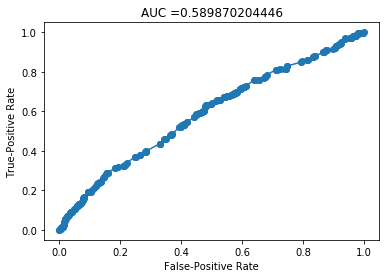

In [24]:
fpr, tpr, auc=  LogRe(X,y)

## Not great